# Homework 3 Solutions

In [2]:
%cd "/home/cody/Physics 331/Textbook Programs/Chapter 2"
%ls

/home/cody/Physics 331/Textbook Programs/Chapter 2
bisect_eq2.py          deriv_eq2.py  figure 2.1.png  figure 2.4.png
bisect.py              equation2.py  Figure 2.2.png  newton.py
Chapter 2 Stuff.ipynb  equation3.py  figure 2.3.png  __pycache__/


In [73]:
import numpy as np
import matplotlib.pyplot as plt
def kepler_equation(u):
    """
    Keplers Equation, 't' needs to be declaired as a global variable outside of the function.
    
    Input
    ----------
    u: Mean anomoly
    
    """
    T = 259200 + 18000 + 2100 #Time of pericenter passage, days + 5 hours + 35 minutes, in seconds.
    P = 3.154e7 #Number of seconds in a year. 
    e = 0.0167 #Eccentricity of Earths orbit
    kepler = u - e*np.sin(u) - 2*np.pi / P * (t - T)
    return kepler

In [3]:
%run bisect.py

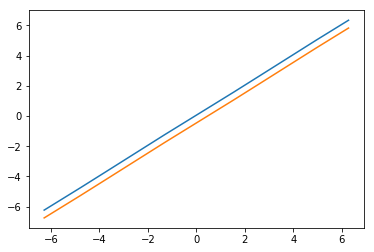

In [23]:
us = np.arange(-2*np.pi,2*np.pi, 0.001)
t = 0
plt.plot(us, kepler_equation(us))
t = 2592000.0
plt.plot(us, kepler_equation(us))

In [74]:
def eccentric_anomaly(times):
    u = []
    for n in times:
        global t
        t = n
        u_temp = bisect(kepler_equation, -2*np.pi, 2*np.pi)
        u.append(u_temp)
    return u, times

In [75]:
times = np.arange(0,3.15e7,10000)
u_foo, t_foo = eccentric_anomaly(times)

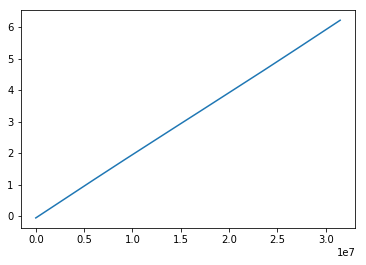

In [82]:
plt.plot(t_foo, u_foo)

In [36]:
times = np.arange(0,3.15e7, 2.592e6)

In [ ]:
import numpy as np
def bisect(func_name, xL, xR):
    """
    Find the solution the input equation f(x) = 0 for some input function. Start
    with the interval xL xR, and return a solution with a relative error
    0.5e-5.

    Inputs
    ----------
    func_name: This is the name of the function that I want to find roots for

    xL:        Smaller 'x' value I want to evaluate func_name at

    xR:        Higher 'x' value I want to evaluate func_name at

    Output
    ----------
    x_zero: 'x' value that returns func_name(x) = 0
    """
    fL = func_name(xL)
    fR = func_name(xR)
    #print("Function at the left: {} \nFunction at the right: {} ".format(fL, fR))
    if fL * fR > 0:     # Same sign on both sides
        return print("Both values give the same sign.") #Exit if inputs are wrong

    while np.abs( xR - xL ) > 1.0e-5 * np.max(np.abs([xL,xR])):
        xMP = 0.5*(xL + xR)
        fMP = func_name(xMP)

        if fMP == 0:       # Got lucky and found the root exactly
            return xMP

        if fMP * fR > 0:
            xR = xMP
            fR = fMP

        else:
            xL = xMP
            fL = fMP
    x_zero = 0.5 * (xL + xR)

    return x_zero
